<a href="https://colab.research.google.com/github/riyamendon99/Automated-Contamination-Assessment-of-Fruit/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive/darkflow-master/darkflow-master
#%cd content/gdrive/Shared with me/darkflow-master

/content/gdrive/My Drive/darkflow-master/darkflow-master


In [ ]:
!pip install -e .

In [ ]:

#!python flow --model cfg/yolo-1.cfg --train --annotation labeled_images --batch 10 --dataset images --gpu 0.8 --save 125 --epoch 1000
!python flow --model cfg/yolo-1.cfg --load -1 --train --annotation labeled_images --batch 10 --dataset images --gpu 0.8 --save 125 --epoch 1000


python3: can't open file 'flow': [Errno 2] No such file or directory


In [ ]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
options ={
'model' : 'cfg/yolo-1.cfg',
'load':14928
,
'threshold' :0.1,
}
tfnet=TFNet(options)
image="42.jpg"
img=cv2.imread(image)
result=tfnet.return_predict(img)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
label_list={}
for i in result:
  tl=(i['topleft']['x'],i['topleft']['y'])
  br=(i['bottomright']['x'],i['bottomright']['y'])
  label=i['label']
  label_list[label]=i['confidence']
  img=cv2.rectangle(img,tl,br,(0,255,0),7)
  plt.imshow(img)
  print(result)

Parsing cfg/yolo-1.cfg
Loading None ...
Finished in 0.00021338462829589844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 76, 76,

In [ ]:
!pip install webcolors

In [ ]:
import cv2
import glob
import numpy as np
import webcolors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plt.rcParams["axes.grid"] = False
listing = [image]
listing

['1.jpg']

In [ ]:
 def find_histogram(clt):
    """
    create a histogram with k clusters
    :param: clt
    :return:hist
    """
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    numLabels=sorted(numLabels)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()
    hist=sorted(hist,reverse=True)
    print(hist)

    return hist

def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

1.jpg


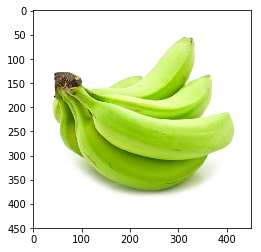

[0.6273481481481481, 0.1262320987654321, 0.1092, 0.1014320987654321, 0.035787654320987655]


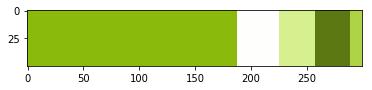

{'yellowgreen': 0.035787654320987655, 'white': 0.1262320987654321, 'khaki': 0.1092, 'darkolivegreen': 0.1014320987654321}


In [ ]:
for images in listing :
    img = cv2.imread(images)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(images)
    plt.imshow(img)
    plt.show()
    img = img.reshape((img.shape[1] * img.shape[0],3)) #represent as row*column,channel number
    clt = KMeans(n_clusters=5) #cluster number
    clt.fit(img)
    hist = find_histogram(clt)
    bar = plot_colors2(hist, clt.cluster_centers_)
    plt.imshow(bar)
    plt.show()
    lis={}
    color_list=[]
    for (a,b) in zip(hist,clt.cluster_centers_):
        x=[int(i) for i in b]
        z=(x[0],x[1],x[2])
        z=get_colour_name((x[0],x[1],x[2]))
        lis[z[1]]=a
        color_list=color_list+[z[1]]
    print(lis)



In [ ]:
labels=list(label_list.keys())
print(labels)
if "banana" in labels:
  labels.remove('banana')
  stalks=labels
  if stalks:
    stalks.sort()
    labels=[stalks[0]]
    print(labels)
  if "yellow_stalk" in labels or "black_stalk" in labels:
    if "khaki" in color_list or "darkkhaki" in color_list or "goldenrod" in color_list or "sandybrown" in color_list:
      print("natural and riped banana")
    elif "black" in color_list or "darkslategrey" in color_list:
      print("rotten banana")
  elif "green_stalk" in labels:
    if "olivegreen" in color_list or 'yellowgreen' in color_list:
      print("natural and unripe banana")
    elif "goldenrod" in color_list or "khaki" in color_list:
      print("artificially ripenend banana")
else:
  print("Couldn't find Banana")
#label_list


['banana', 'green_stalk']
['green_stalk']
natural and unripe banana
